# Logistic Regression

## Exercise 1

### Introduction

Let's start the day with a quick practice of our new tool, the **logistic regression**.<br>
The **dataset** in this exercise was created for prediction of **Graduate Admissions**.<br>


**Dataset:** "Admission_Predict.csv"<br>

**Columns:** <br>
**"CGPA"**, range [6.0, 10.0], Cumulative Grade Point Average <br>
**"University Rating"**, range [1, 5] <br>
**"Admited"**, range [0,1] <br>

### Exercise questions:

1. What is the **difference in precision** between the **linear** and **logistic** regression for this classification?
2. If your **CGPA is 7.8**, which is the **best university** you can apply to and have a probability of more than **90%** to be accepted?
3. If your **CGPA is 7.8**, which is the **best university** you can apply to and have a probability of more than **50%** to be accepted?
4. What should be your CGPA in order to have a probabilty of **90%** to enter in the **best ranking** univesity?

### Exercise layout:

1. Data exploration
2. Try precition with linear regression
3. Logistic regression to predict admission to rank 3 university
4. Find at wich CGPA the probability of admission is 0.5 and 0.9 for rank 3 university
5. Make the same observation for the other university ranks

## 1/ Data exploration

Before creating our model let's just import the dataset and see what's inside.

In [1]:
# The usual imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Dataset import
df = pd.read_csv('Admission_Predict.csv', sep=",")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df = df.drop(columns=['Serial No.', 'GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'Research'])
df.head()
#df = df.drop(columns=['Serial No.'])

,University Rating,CGPA,Research,Chance of Admit
0,4,9.65,1,0.92
1,4,8.87,1,0.76
2,3,8.00,1,0.72
3,3,8.67,1,0.80
4,2,8.21,0,0.65


In [4]:
import random

# assume sum of bias is 1
def biased_roll(massDist):
    randRoll = random.random() # in [0,1)
    sum = 0
    result = 0
    for mass in massDist:
        sum += mass
        if randRoll < sum:
            return result
        result+=1

print(biased_roll([0.48, 0.52]))

1


In [5]:
df['Chance of Admit '] = df['Chance of Admit '].apply(lambda x: 1 if x >= 0.80 else 0)
df.head()

,University Rating,CGPA,Research,Chance of Admit
0,4,9.65,1,1
1,4,8.87,1,0
2,3,8.00,1,0
3,3,8.67,1,1
4,2,8.21,0,0


In [6]:
df.rename(columns={'Chance of Admit ': 'Admited'}, inplace=True)

### Ploting our data

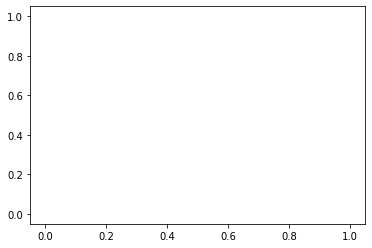

In [38]:
ax = sns.scatterplot(x="CGPA", y='Admited', data=df[df['University Rating'] == 6], palette="cool")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
University Rating    400 non-null int64
CGPA                 400 non-null float64
Research             400 non-null int64
Admited              400 non-null int64
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


## 2/ Linear VS Logistic Regression

We can now create 2 model and compare the accuracy of each one.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df.drop(columns=['Admited'])
y = df['Admited']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/Users/gaetan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
predictions = logmodel.predict(X_test)

In [15]:
from sklearn.metrics import classification_report

In [16]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        51
           1       0.92      0.79      0.85        29

    accuracy                           0.90        80
   macro avg       0.91      0.88      0.89        80
weighted avg       0.90      0.90      0.90        80



In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
linmodel = LinearRegression()
linmodel.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
lin_predictions = linmodel.predict(X_test)

In [20]:
f = lambda x: 1 if x >= 0.80 else 0
f = np.vectorize(f)
lin_adm_prediction = f(lin_predictions)
lin_adm_prediction

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [21]:
print(classification_report(y_test,lin_adm_prediction))


              precision    recall  f1-score   support

           0       0.75      1.00      0.86        51
           1       1.00      0.41      0.59        29

    accuracy                           0.79        80
   macro avg       0.88      0.71      0.72        80
weighted avg       0.84      0.79      0.76        80



In [39]:
df['University Rating'].unique()

array([4, 3, 2, 5, 1])

In [42]:
df[df['University Rating'] == 3]

,University Rating,CGPA,Research,Admited
2,3,8.00,1,0
3,3,8.67,1,1
6,3,8.20,1,0
9,3,8.60,0,0
10,3,8.40,1,0
13,3,8.00,1,0
14,3,8.20,1,0
15,3,8.30,0,0
16,3,8.70,0,0
17,3,8.00,1,0
